In [170]:
import numpy as np
import math as m
import astropy
import aplpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.utils.data import get_pkg_data_filename
import matplotlib.patheffects as PathEffects
import scipy.optimize as opt
import sympy as sym

In [171]:
Ihdu_list = fits.open('l483_iext_mJysqa_8as.fits')
Ihdu = fits.open('l483_iext_mJysqa_8as.fits')[0]
Iwcs = WCS(Ihdu.header)
#Ihdu.header
Iimage_data = Ihdu_list[0].data

IVar = Ihdu_list[1].data


IData = []
IPolData = []
for i in range(0, len(Iimage_data[0])):
    for j in range(0, len(Iimage_data[0][i])):
        IPolData.append([j,i,Iimage_data[0][i][j]])
        IData.append(Iimage_data[0][i][j])
        
IVarData = []
for i in range(0, len(IVar[0])):
    for j in range(0, len(IVar[0][i])):
        IVarData.append([j,i,IVar[0][i][j]])
        

        
        
Qhdu_list = fits.open('l483_qext_mJysqa_8as.fits')
Qhdu = fits.open('l483_qext_mJysqa_8as.fits')[0]
Qwcs = WCS(Qhdu.header)
#Qhdu.header
Qimage_data = Qhdu_list[0].data

QVar = Qhdu_list[1].data

QData = []
QPolData = []
for i in range(0, len(Qimage_data[0])):
    for j in range(0, len(Qimage_data[0][i])):
        #print([i,j,Qimage_data[0][i][j]])
        QPolData.append([j,i,Qimage_data[0][i][j]])
        QData.append(Qimage_data[0][i][j])

QVarData = []
for i  in range(0, len(QVar[0])):
    for j in range(0, len(QVar[0][i])):
        #print([i,j,QVar[0][i][j]])
        QVarData.append([j,i,QVar[0][i][j]])
        
        

        
Uhdu_list = fits.open('l483_uext_mJysqa_8as.fits')
Uhdu = fits.open('l483_uext_mJysqa_8as.fits')[0]
Uwcs = WCS(Uhdu.header)
#Uhdu.header
Uimage_data = Uhdu_list[0].data

UVar = Uhdu_list[1].data


UData = []
UPolData = []
for i in range(0, len(Uimage_data[0])):
    for j in range(0, len(Uimage_data[0][i])):
        UPolData.append([j,i,Uimage_data[0][i][j]])
        UData.append(Uimage_data[0][i][j])
        
UVarData = []
for i in range(0, len(UVar[0])):
    for j in range(0, len(UVar[0][i])):
        UVarData.append([j,i,UVar[0][i][j]])
        
        
        
        
        
PolDataC = []
for i in range(0,len(QPolData)):
    PolDataC.append([QPolData[i][0],QPolData[i][1],IPolData[i][2],QPolData[i][2],UPolData[i][2]])
    
PolVar = []
for i in range(0,len(QVarData)):
    PolVar.append([QVarData[i][0],QVarData[i][1],IVarData[i][2],QVarData[i][2],UVarData[i][2]])
    
sigI=0.02718023855912932

Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [172]:
kv = 0.00125
h=6.62607004*10**(-34)
c=3*10**8
k=1.38064852*10**(-23)
v = c / 0.00085
a = (2.0*h*v**3)
distance = 6.171*10**18


def mass(flux, temp, kv1): 
    b = (h*v)/(k*temp)
    intensity = a/ ((c**2)*(np.exp(b) - 1.0))  
    
    flux = (flux*(10**(-26)))/1000
    
    mass = (flux*(distance**2))/(kv1*intensity)

    return mass

massList10 = []
massList13 = []
massList18 = []

pixDistList = []

totalMass10 = 0
totalMass13 = 0
totalMass18 = 0

massDisk10 = []
massDisk13 = []
massDisk18 = []

densDisk10 = []
densDisk13 = []
densDisk18 = []

densDisk10.clear()
densDisk13.clear()
densDisk18.clear()

massDisk10.clear()
massDisk13.clear()
massDisk18.clear()



for j in range(0,13):
    
    pixels = 0
    pixDistList.append(j)
    
    diskMass10 = 0
    diskMass13 = 0
    diskMass18 = 0
    
    for i in range(len(IPolData)):
        
        if IPolData[i][2] != 0:
            
            spacing = np.sqrt((IPolData[i][0]-74)**2+(IPolData[i][1]-67)**2)
            
            if spacing <= j:
                
                pixels += 1
                
                #fluxAv += IPolData[i][2]
                flux = IPolData[i][2]* 7.99999**2
            
                plusMass10 = mass(flux,10)
                plusMass13 = mass(flux,13)
                plusMass18 = mass(flux,18)
                
                diskMass10 += plusMass10
                diskMass13 += plusMass13
                diskMass18 += plusMass18
                
                IPolData[i][2] = 0
            
                totalMass10 += plusMass10
                totalMass13 += plusMass13
                totalMass18 += plusMass18
    print(pixels)
    depth = 2*np.sqrt((8*pixLength)**2-(j*pixLength)**2)
    print(depth)
    volume = depth * pixLength**2
    
    
    
    
    massAv10 = diskMass10/pixels
    massAv13 = diskMass13/pixels
    massAv18 = diskMass18/pixels
    #print("mass/pix", massAv10)
    #print("VOlume", volume)
    
    #print('massAv10kg', massAv10kg)
    
    density10 = massAv10/volume
    density13 = massAv13/volume
    density18 = massAv18/volume
    
    #print('massDens', density10)
    numDens10 = density10 / ((2.8*(1.67*10**(-27)))* (1*10**6))
    numDens13 = density13 / ((2.8*(1.67*10**(-27)))* (1*10**6))
    numDens18 = density18 / ((2.8*(1.67*10**(-27)))* (1*10**6))
  
    massDisk10.append(massAv10)
    massDisk13.append(massAv13)
    massDisk18.append(massAv18)
    
    densDisk10.append(numDens10)
    densDisk13.append(numDens13)
    densDisk18.append(numDens18)
    
    massList10.append(totalMass10)
    massList13.append(totalMass13)
    massList18.append(totalMass18)

In [173]:
kv_gauss = np.random.normal(kv, 0.5*kv)

t_gauss = np.random.normal(13,3)



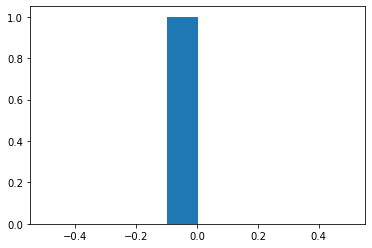

In [174]:
plt.hist(kv_gauss, 10)
plt.show()

In [175]:
pixDistList = []

maxMassList = []
minMassList = []

fluxList = []

meanMass = []
midMass = []

plusMassList = []
cum_massMax = 0
cum_massMin = 0

cum_massMaxList = []
cum_massMinList = []

cum_massIdeal = 0
cum_massIdealList = []
for j in range(0,13):
    pixels = 0
    pixDistList.append(j)
    fluxList.clear()
    diskmass = 0
    for i in range(len(IPolData)):
        spacing = np.sqrt((IPolData[i][0]-74)**2+(IPolData[i][1]-67)**2)
        if spacing <= j:
            if IPolData[i][2] != 0 and np.isnan(IPolData[i][2]) == False:  
                pixels += 1
                if pixels > 1:
                    flux = IPolData[i][2]* 7.99999**2
                    #print(flux)
                    fluxList.append(flux)
                    IPolData[i][2] = 0
                else:
                    flux = IPolData[i][2]* 7.99999**2
                    fluxList.append(flux)
                    
                    
    plusMassList.clear()
    z = 0
    
    if len(fluxList) == 1:
        while z < 1000:
            rand_temp = np.random.normal(13,3)
            rand_kv = np.random.normal(kv, 0.5*kv)
        
            plusMass = mass(fluxList[0],rand_temp,rand_kv)
            plusMassList.append(plusMass)
            
            z+=1
            
    else:
        while z < 1000:
            rand_flux = np.random.normal(np.mean(fluxList),np.std(fluxList))
            rand_temp = np.random.normal(13,3)
            rand_kv = np.random.normal(kv, 0.25*kv)
        
            plusMass = mass(rand_flux,rand_temp,rand_kv)
            plusMassList.append(plusMass)
        
            z+=1
    
    for i in range(len(fluxList)):
        cum_massIdeal += mass(fluxList[i],13,kv)/(1.989*10**30)
    
    cum_massIdealList.append(cum_massIdeal)
    maxMass = np.quantile(plusMassList, .75)/(1.989*10**30)
    minMass = np.quantile(plusMassList, .25)/(1.989*10**30)
    
    #print(maxMass, pixels)
    #print(minMass, pixels)
    
    cum_massMax += maxMass * pixels
    cum_massMin += minMass * pixels
    
    cum_massMaxList.append(cum_massMax)
    cum_massMinList.append(cum_massMin)
    
    maxMassList.append(maxMass)
    minMassList.append(minMass)
    
    meanMass.append(np.mean(plusMassList)/(1.989*10**30))
    midMass.append(np.quantile(plusMassList, .50)/(1.989*10**30))

In [176]:
pixLength = 2*distance*(np.tan(m.radians(0.001111)))/(1.496*10**11)
print(7*pixLength)

11198.076115430396


In [177]:
for i in range(len(pixDistList)):
    pixDistList[i] = pixDistList[i]*pixLength

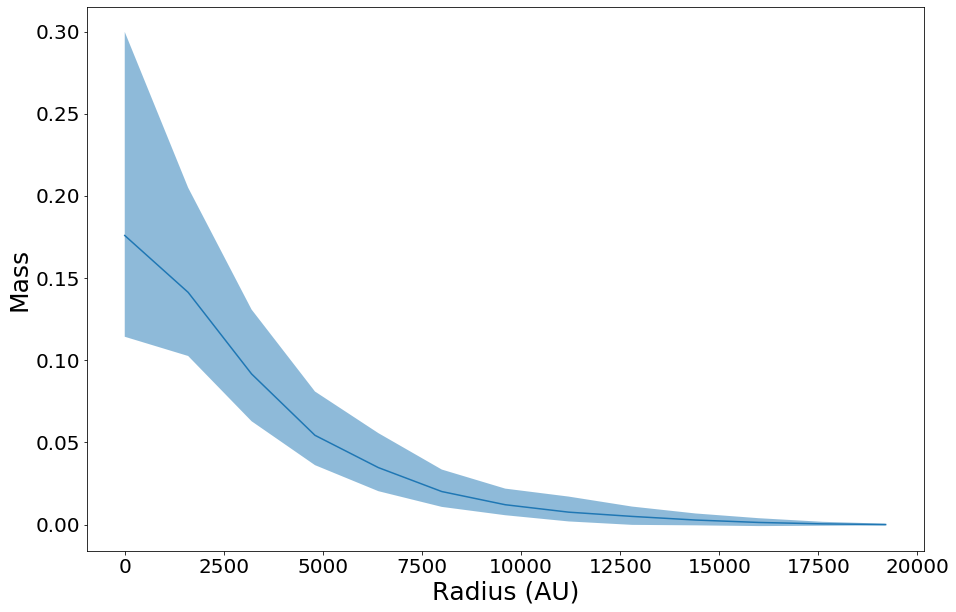

In [178]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.xlabel('Radius (AU)',fontsize='25')
plt.ylabel('Mass',fontsize='25')
plt.fill_between(pixDistList,minMassList,maxMassList, alpha = 0.5)
#plt.plot(pixDistList,meanMass)
plt.plot(pixDistList,midMass)
plt.savefig('uncertain_mass.png')
plt.show()

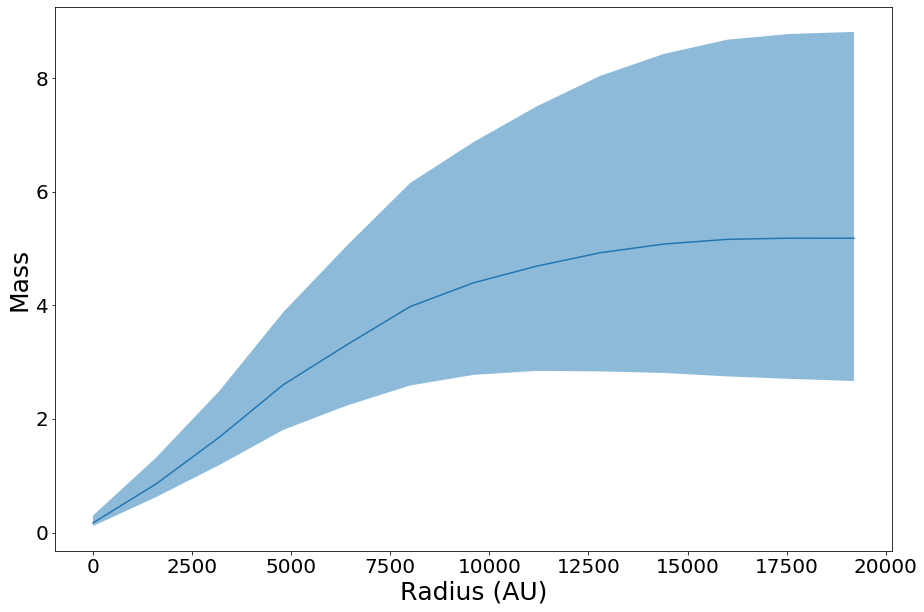

In [179]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.xlabel('Radius (AU)',fontsize='25')
plt.ylabel('Mass',fontsize='25')
plt.fill_between(pixDistList,cum_massMaxList,cum_massMinList, alpha = 0.5)
plt.plot(pixDistList,cum_massIdealList)
plt.savefig('uncertain_cum_mass.png')
plt.show()

In [180]:
print(cum_massMaxList)

[0.2997863153959915, 1.3246440603064606, 2.5023606941851417, 3.8787395235697355, 5.047018928519808, 6.151710700174328, 6.873574617557306, 7.503598209754925, 8.039944500023067, 8.424871624527905, 8.676045848140296, 8.778507848565717, 8.81338700716002]


In [181]:
print(cum_massMinList)

[0.11428004357022611, 0.6271508462713924, 1.193049057183975, 1.8076666567982915, 2.2342205724475894, 2.5888945163417514, 2.776278997391924, 2.846566656738349, 2.837294851481062, 2.810040633625081, 2.7492540891263357, 2.7044707720515944, 2.668448863856687]


In [182]:
print(cum_massIdealList)

[0.17010984932512646, 0.8598584642900113, 1.6854049259817743, 2.6016336658345285, 3.303622562809629, 3.9768474179380675, 4.3967896030300295, 4.690834278529492, 4.926388095280558, 5.078988590450323, 5.161787957048694, 5.182811025992203, 5.181682426322062]


In [183]:
B,dens,sigma_dens,velo,sigma_velo,ang,sigma_ang,M,dM,R,dR,b,db,T,dT,G,mu,mH,EG,EB,EKT,ENT,mu0,kb,sigNT,V,dV = sym.symbols('B dens sigma_dens velo sigma_velo ang sigma_ang M dM R dR b sigma_b T sigma_T G mu m_H E_G E_B E_KT E_NT mu_o k_b sigma_NT V dV')

In [184]:
B = sym.sqrt(dens)*velo/ang

e_dens = sym.diff(B,dens)*sigma_dens
e_velo = sym.diff(B,velo)*sigma_velo
e_ang = sym.diff(B,ang)*sigma_ang
e_B = sym.sqrt(e_dens**2+e_velo**2+e_ang**2)

display(e_dens)
display(e_velo)
display(e_ang)
display(e_B)

sigma_dens*velo/(2*ang*sqrt(dens))

sqrt(dens)*sigma_velo/ang

-sqrt(dens)*sigma_ang*velo/ang**2

sqrt(dens*sigma_velo**2/ang**2 + sigma_dens**2*velo**2/(4*ang**2*dens) + dens*sigma_ang**2*velo**2/ang**4)

In [185]:
def er_dens(dens,sigDens,velo,sigVelo,ang,sigAng):
    return (sigDens*velo)/(2*ang*sym.sqrt(dens))

def er_velo(dens,sigDens,velo,sigVelo,ang,sigAng):
    return (sym.sqrt(dens)*sigVelo)/ang

def er_ang(dens,sigDens,velo,sigVelo,ang,sigAng):
    return -1*(sym.sqrt(dens)*sigAng*velo)/ang**2

def er_B(dens,sigDens,velo,sigVelo,ang,sigAng):
    return sym.sqrt(er_dens(dens,sigDens,velo,sigVelo,ang,sigAng)**2
                    +er_velo(dens,sigDens,velo,sigVelo,ang,sigAng)**2
                    +er_ang(dens,sigDens,velo,sigVelo,ang,sigAng)**2)

In [194]:
print(er_B(7.6*10**4,1*10**5,0.4,0.2,11.8,5.9))

9.02578494333149


In [187]:
print(type(G))
print(type(M))
print(type(R))

<class 'sympy.core.symbol.Symbol'>
<class 'sympy.core.symbol.Symbol'>
<class 'sympy.core.symbol.Symbol'>


In [188]:
EG = 3*(G*M**2)/(R*5)
EB = ((b**2)*V)/(2*mu0)
EKT = (3*M/2)*(kb*T)/(mu*mH)
ENT = (1/2)*M*sigNT

EG_mass = sym.diff(EG,M)*dM
EG_rad = sym.diff(EG,R)*dR

e_EG = sym.sqrt(EG_mass**2+EG_rad**2)


EB_mag = sym.diff(EB,b)*db
EB_vol = sym.diff(EB,V)*dV

e_EB = sym.sqrt(EB_mag**2+EB_vol**2)


EKT_temp = sym.diff(EKT,T)*dT

e_EKT = sym.sqrt(EKT_temp**2)


ENT_mass = sym.diff(ENT,M)*dM

e_ENT = sym.sqrt(ENT_mass**2)


display(e_EG)
display(e_EB)
display(e_EKT)
display(e_ENT)

sqrt(9*G**2*M**4*dR**2/(25*R**4) + 36*G**2*M**2*dM**2/(25*R**2))

sqrt(V**2*b**2*sigma_b**2/mu_o**2 + b**4*dV**2/(4*mu_o**2))

3*sqrt(M**2*k_b**2*sigma_T**2/(m_H**2*mu**2))/2

0.5*sqrt(dM**2*sigma_NT**2)

In [196]:
def er_EG(G,M,dM,R,dR):
    return sym.sqrt((9*(G**2)*(M**4)*(dR)**2)/(25*R**4)+(36*(G**2)*(M**2)*(dM**2))/(25*R**2))

def er_EB(b,db,V,dV,mu0):
    return sym.sqrt(((V**2)*(b**2)*(db**2))/mu0**2 + ((b**4)*(dV**2)/(4*mu0**2)))

def er_EKT(M,kb,dT,mu,mH):
    return 3*sym.sqrt((M**2)*(kb**2)*(dT**2)/((mH**2)*(mu**2)))/2

def er_ENT(dM,sigNT):
    return 0.5*sym.sqrt((dM**2)*(sigNT**2))

In [197]:
magTesla = (90*10**(-6))/10000
uncMagTesla = 12*10**(-6)/10000
volume = 3.1*10**46
dV = 0
mu0 = 4*np.pi*10**(-7)
print(er_EB(magTesla,uncMagTesla,volume,dV,mu0))

2.66425374735833e+35


In [198]:
massMin=2.7*(1.989*10**30)
massMax=8.9*(1.989*10**30)
massIdeal=5.1*(1.989*10**30)
kb = 1.39*10**(-23)
mH = 1.67*10**(-27)

print(er_EKT(massIdeal,kb,3,2.8,mH))

1.35693102010265e+35


In [201]:
print(er_ENT(3.9*(1.989*10**30),4000))

1.55142000000000e+34


In [200]:
rad = 1.945*10**15 
print(er_EG(6.674*10**(-11),massIdeal,3.9*(1.989*10**30),rad,0))

3.24005357990166e+36


In [193]:



mH = 1.67*10**(-27)
radcm = 1.6*10**17
volume = (4*np.pi*radcm**3)/3
print(volume)
num_dens = massIdeal / (2.8*volume * mH)
num_densMax = massMax / (2.8*volume * mH)
num_densMin = massMin / (2.8*volume * mH)

print(num_dens)
print(num_densMax)
print(num_densMin)

1.7157284678805055e+52
126439.24662071031
220648.8813577102
66938.42468155253
